In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [3]:
data = pd.read_csv('techcrunch_posts.csv')
orgs = pd.read_csv('organizations.csv')
people = pd.read_csv('people.csv')

In [4]:
cat_start_data = data[data['category'] == 'Startups']

### TODO:
- Create time series graph of "hype/PR"
- Extract company names and group them with their respective posts
- Create sentiment analysis on each post within the company group
- Graph the sentiment analysis against outcome (if exists) "funded/exits/failures"

In [9]:
cat_start_data

,authors,category,content,date,id,img_src,section,tags,title,topics,url
0,Dale Chang,Startups,\n\nTech investing isn’t what it used to be — ...,2016-10-15,1401293,https://tctechcrunch2011.files.wordpress.com/2...,startups/,data,How startups can use data to grow smarter,NaN,https://techcrunch.com/2016/10/15/how-startups...
4,Megan Rose Dickey,Startups,"Uber, the ridesharing behemoth that recently b...",2016-10-13,1401633,https://tctechcrunch2011.files.wordpress.com/2...,startups/,lawsuits,Uber hits another roadblock,uber,https://techcrunch.com/2016/10/13/uber-hits-an...
5,Ajay Chopra,Startups,"\n\nDespite what some politicians say, no coun...",2016-10-13,1399039,https://tctechcrunch2011.files.wordpress.com/2...,startups/,partnerships,From the distributed workforce to the partnere...,NaN,https://techcrunch.com/2016/10/13/from-the-dis...
14,John Rampton,Startups,\n\nThe JOBS Act was signed into law by Presid...,2016-10-12,1399031,https://tctechcrunch2011.files.wordpress.com/2...,startups/,"securities-and-exchange-commission,equity-crow...",What regulation crowdfunding in the JOBS Act m...,american-jobs-act,https://techcrunch.com/2016/10/12/what-regulat...
111,Anthony Ha,Startups,Remote Year should be a pretty appealing idea ...,2016-10-11,1399984,https://tctechcrunch2011.files.wordpress.com/2...,startups/,"remote-work,highland-capital-partners",Remote Year raises $12 million to combine remo...,NaN,https://techcrunch.com/2016/10/11/remote-year-...
118,Romain Dillet,Startups,It’s easy to feel like you’re missing out on a...,2016-10-10,1399323,https://tctechcrunch2011.files.wordpress.com/2...,startups/,travel,Journy tells you what you should do during you...,NaN,https://techcrunch.com/2016/10/10/journy-tells...
120,Sarah Perez,Startups,During a contentious election filled with accu...,2016-10-10,1399205,https://tctechcrunch2011.files.wordpress.com/2...,startups/,"audio,search-engine,deepgram",Deepgram’s speech search engine is now free fo...,NaN,https://techcrunch.com/2016/10/10/deepgrams-sp...
178,Ben Narasin,Startups,\n\nThere are three types of science fiction (...,2016-10-08,1397923,https://tctechcrunch2011.files.wordpress.com/2...,startups/,"advice-for-entrepreneurs,science-fiction,entre...",The importance of science fiction to entrepren...,NaN,https://techcrunch.com/2016/10/08/the-importan...
325,Dr. Nancy Markley,Startups,\n\nMany startup companies begin with either a...,2016-10-04,1396165,https://tctechcrunch2011.files.wordpress.com/2...,startups/,"startup-advice,theranos",Due diligence is a responsibility for investor...,NaN,https://techcrunch.com/2016/10/04/due-diligenc...
329,Sam O'Keefe,Startups,Closing a Series A is notoriously hard — so mu...,2016-10-04,1396078,https://tctechcrunch2011.files.wordpress.com/2...,startups/,"business-incubators,business,economy,shippo",Lessons from Shippo’s Series A,NaN,https://techcrunch.com/2016/10/04/lessons-from...


In [10]:
def plot_nouns(content, thresh):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = nltk.word_tokenize(content)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
    noun_counts = Counter(nouns)
    nc_thresh = thresh
    nc_df = pd.DataFrame.from_dict(noun_counts, orient='index')
    nc_df = nc_df[nc_df[0] >= thresh]
    nc_df.plot(kind='bar')
    plt.show()

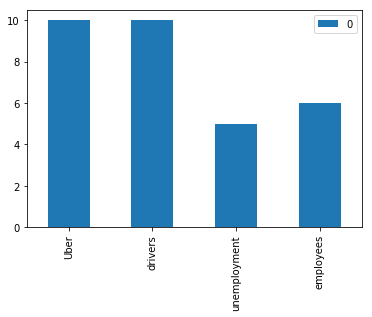

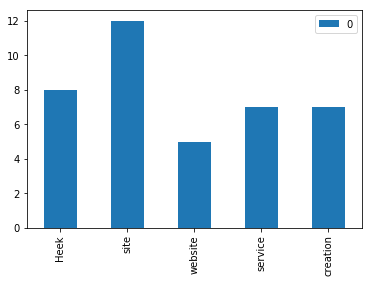

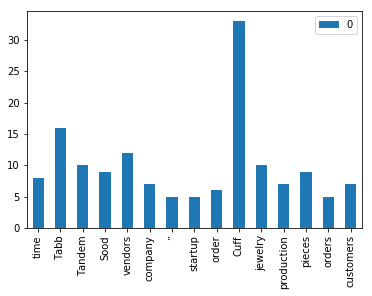

'https://techcrunch.com/2016/09/23/defunct-smart-jewelry-startup-cuff-sued-by-vendors-for-unpaid-work/'

In [11]:
# Generalize, example used article 4: "Uber"
plot_nouns(cat_start_data.loc[4]['content'], 5)
plot_nouns(cat_start_data.loc[428]['content'], 5)
plot_nouns(cat_start_data.loc[764]['content'], 5)
cat_start_data.loc[764]['url']

In [12]:
# Use either crunchbase or angelist API 
# to match nouns with company names